In [3]:
import numpy as np
import pandas as pd
train_df = pd.read_csv(".//Data//train.csv")
train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [5]:
test_df = pd.read_csv(".//Data//test.csv")
test_df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [7]:
sample_submission = pd.read_csv(".//Data//sample_submission.csv")
sample_submission.head()

,textID,selected_text
0,f87dea47db,NaN
1,96d74cb729,NaN
2,eee518ae67,NaN
3,01082688c6,NaN
4,33987a8ee5,NaN


In [8]:
# train_labels = train_df[['selected_text','sentiment']].values
train_labels = train_df['sentiment'].values
train_labels

array(['neutral', 'negative', 'negative', ..., 'positive', 'positive',
       'neutral'], dtype=object)

In [9]:
train_features = train_df["text"].values
train_features

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype=object)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

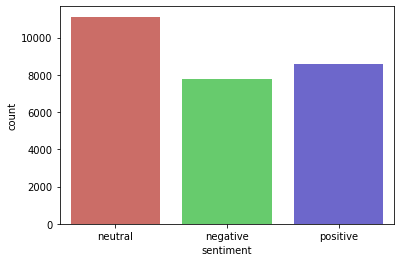

In [10]:
import seaborn as sb  
%matplotlib inline  
sb.countplot(x='sentiment', data = train_df, palette = 'hls')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

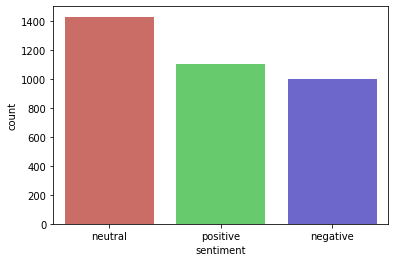

In [11]:
import seaborn as sb  
%matplotlib inline  
sb.countplot(x='sentiment', data = test_df, palette = 'hls')

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

stemmer=PorterStemmer()
stop_words=set(stopwords.words("english"))
def tweet_preprocessing(tweets):
   list_tweets_words=[]
   for tweet in tweets:
    list_tweet_words=[]
    tweet=tweet.lower()
    ##Remove userName
    tweet=re.sub(r"@[a-z0-9_-]*","",tweet)
    ##Remove hyperlinks
    tweet=re.sub(r"https?://.*[\s]*","",tweet)
    ## Remove numbers and characters
    tweet=re.sub(r"[^a-z ]*","",tweet)
    ## Replace multiple spaces by single space
    tweet=re.sub(r"[\s]+"," ",tweet)
    ##Word Tokenization
    tweet_words=word_tokenize(tweet)
    for word in tweet_words:
        if(word not in stop_words):
          word=stemmer.stem(word)
          list_tweet_words.append(word)
    ## join : from list of words to string
    list_tweets_words.append(" ".join(list_tweet_words))
   return list_tweets_words

tweets =['99I`d have responded, if I were going','Sooo SAD']  
test = tweet_preprocessing(tweets)
test

['id respond go', 'sooo sad']

In [14]:
#train_features
cleaned_text = tweet_preprocessing(train_features.astype(str))[0:10]
train_features [0:10]

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ' what interview! leave me alone',
       ' Sons of ****, why couldn`t they put them on the releases we already bought',
       'http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth',
       '2am feedings for the baby are fun when he is all smiles and coos',
       'Soooo high', ' Both of you',
       ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)'],
      dtype=object)

In [42]:
# setup requirements
#import tensorflow
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Dense, Activation
from keras.utils import np_utils, to_categorical
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from sklearn.model_selection import train_test_split
from keras.layers.recurrent import GRU
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [43]:
#We define the representation vector for each sequences. We use the tokenizer package  
#Each sequence is represented by  a token, a word is a token
max_fatures = 2000
tokenizer = Tokenizer(split=' ')
#print(tokenizer.fit_on_texts)
tokenizer.fit_on_texts(cleaned_text)
X = tokenizer.texts_to_sequences(cleaned_text)
X = pad_sequences(X) 

#The last instruction pads each sequence with zeros at the beginning of the string representation
#such that each string has 29 characters
print(X)
print(X[1])





[[ 0  0  0  0  1  2  3]
 [ 0  0  4  5  6  7  8]
 [ 0  0  0  0  0  9 10]
 [ 0  0  0  0 11 12 13]
 [ 0 14 15 16 17 18 19]
 [ 0  0  0  0  0  0  0]
 [ 0  0 20 21 22 23 24]
 [ 0  0  0  0  0 25 26]
 [ 0  0  0  0  0  0  0]
 [27 28 29 30 31 32 33]]
[0 0 4 5 6 7 8]


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [17]:
## LSTM




embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 7, 128)            256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 7, 128)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None
